In [4]:
import os
import numpy as np
import pandas as pd
os.chdir("C://Users//Admin//Titanic")

In [5]:
train=pd.read_csv("train.csv")

In [6]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train.drop_duplicates(keep=False, inplace=True)

In [10]:
len(train)

891

In [11]:
import seaborn as sns

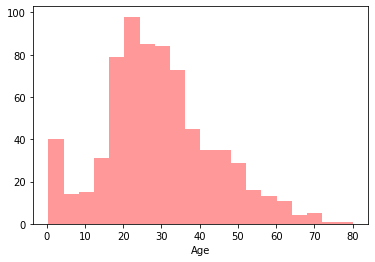

In [12]:
sns.distplot(train['Age'].dropna(), color='red', kde=False)

In [13]:
train['Sex'] = [ 1 if x == 'male' else 0 for x in train['Sex']]

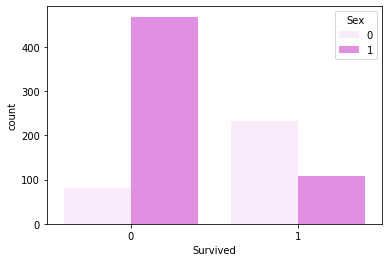

In [14]:
sns.countplot(train['Survived'], hue=train['Sex'], data=train, color='Violet')

In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
z = train.drop(['Survived'], axis=1)

In [17]:
for x in z.columns:
    if z[x].dtypes == 'object':
        b = len(z[x].unique())
        print('The Feature ' + x + ' has ' + str(b) + ' unique values')

The Feature Name has 891 unique values
The Feature Ticket has 681 unique values
The Feature Cabin has 148 unique values
The Feature Embarked has 4 unique values


In [18]:
# Let's drop Name, ticket and Cabin fields from the dataset.
z.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [19]:
z['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
def impute_Embark(cols):
    d = cols[0]
    if pd.isnull(d):
        return 'S'
    else:
        return d

    

In [21]:
z['Embarked'] = z[['Embarked']].apply(impute_Embark, axis=1)

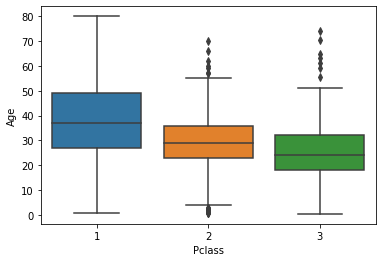

In [22]:
sns.boxplot(x=z['Pclass'], y=z['Age'].dropna())

In [23]:
def impute_age(cols):
    age = cols[0]
    clas = cols[1]
    if pd.isnull(age):
        if clas == 1:
            return 39
        elif clas == 2:
            return 30
        else:
            return 27
    else:
        return age

In [24]:
z['Age'] = z[['Age', 'Pclass']].apply(impute_age, axis=1)

In [25]:
z.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [26]:
z.drop(['PassengerId'], inplace=True, axis=1)

In [27]:
z.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
def find_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5 * iqr
    outlier_index = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_index])
    return outlier_index, outlier_values

In [29]:
tukey_indices, tukey_values = find_outlier_tukey(z['Age'])
print(np.sort(tukey_values))

[60.  60.  60.  60.  61.  61.  61.  62.  62.  62.  62.  63.  63.  64.
 64.  65.  65.  65.  66.  70.  70.  70.5 71.  71.  74.  80. ]


In [30]:
z.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.604007,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.155746,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
z['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
def impute_Parch(cols):
    parch = cols[0]
    if parch > 1:
        return ">1"
    else:
        return parch

In [33]:
z['Parch'] = z[['Parch']].apply(impute_Parch, axis=1)

In [34]:
z['Parch'].value_counts()

0     678
1     118
>1     95
Name: Parch, dtype: int64

In [35]:
pd.crosstab(z['Parch'], train['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
>1,51,44


In [36]:
z['Parch'] = [1 if x != 0 else 0 for x in z['Parch']]

In [37]:
pd.crosstab(z['Parch'], train['Survived'])

Survived,0,1
Parch,,
0,445,233
1,104,109


In [38]:
z.drop(['Fare'], inplace=True, axis=1)

In [39]:
z.describe()

,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.604007,0.523008,0.239057
std,0.836071,0.477990,13.155746,1.102743,0.426747
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000
75%,3.000000,1.000000,37.000000,1.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,1.000000


In [40]:
z.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,S
1,1,0,38.0,1,0,C
2,3,0,26.0,0,0,S
3,1,0,35.0,1,0,S
4,3,1,35.0,0,0,S


In [41]:
pd.crosstab(z['SibSp'], train['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [42]:
z['SibSp'] = [2 if x >= 2 else x for x in z['SibSp']]

In [43]:
pd.crosstab(z['SibSp'], train['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,54,20


In [44]:
z.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,S
1,1,0,38.0,1,0,C
2,3,0,26.0,0,0,S
3,1,0,35.0,1,0,S
4,3,1,35.0,0,0,S


In [45]:
dummies_list = ['Pclass', 'SibSp', 'Embarked']

In [46]:
def get_dummies(cols):
    df = cols[0]
    lis = cols[1]
    for x in lis:
        dummy = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummy], axis=1)
    return df
        

In [47]:
z = get_dummies([z, dummies_list])

In [48]:
z.head()

,Sex,Age,Parch,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,0,0,0,1,0,1,0,0,0,1
1,0,38.0,0,1,0,0,0,1,0,1,0,0
2,0,26.0,0,0,0,1,1,0,0,0,0,1
3,0,35.0,0,1,0,0,0,1,0,0,0,1
4,1,35.0,0,0,0,1,1,0,0,0,0,1


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(z, train['Survived'], test_size=0.2, random_state=123)

In [52]:
rmd = RandomForestClassifier(max_depth = 4, n_estimators=300, bootstrap=True)

In [53]:
mod = rmd.fit(x_train, y_train)

In [54]:
predictions = mod.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
accuracy_score(y_test, predictions)

0.88268156424581

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
confusion_mat = confusion_matrix(y_test, predictions)

In [58]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [59]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,109,5
Actual pos,16,49


In [61]:
probs = mod.predict_proba(x_test)[::,1]

In [62]:
auc = roc_auc_score(y_test, probs)
print(auc)

0.8912280701754386
